In [1]:
import pandas as pd
df = pd.read_csv('education_search_world.csv')

In [2]:
# İsimlendirilmemiş sütun veri setindeki satır numarasını belirtir.
# date sütunu verinin ait olduğu tarih bilgisini içerir.
# hits sütunu belirli bir anahtar kelimenin o tarihteki arama hacmini (popülerlik skorunu) belirtir.
# keyword sütunu analiz edilen anahtar kelimeyi ifade eder.
# geo sütunu verinin ait olduğu coğrafi bölgeyi belirtir (bu projede sadece "world" yani dünya geneli olan datalar kullanılmıştır).
# time sütunu verinin kapsadığı zaman aralığını belirtir.
# gprop sütunu, verinin geldiği Google hizmetini belirtir.
# (bu projede "web", "news", "youtube" içerisinden sadece web aramaları incelenmiştir, datada diğer gprop değerleri bulunmamaktadır)
# category sütunu, anahtar kelimenin ait olduğu kategori kodunu gösterir.

In [3]:
print(df.head())

   Unnamed: 0        date hits          keyword    geo                   time  \
0           1  2017-12-01   29  Online Learning  world  2017-12-01 2024-04-30   
1           2  2018-01-01   33  Online Learning  world  2017-12-01 2024-04-30   
2           3  2018-02-01   34  Online Learning  world  2017-12-01 2024-04-30   
3           4  2018-03-01   34  Online Learning  world  2017-12-01 2024-04-30   
4           5  2018-04-01   31  Online Learning  world  2017-12-01 2024-04-30   

  gprop  category  
0   web         0  
1   web         0  
2   web         0  
3   web         0  
4   web         0  


In [4]:
print(df.tail())

     Unnamed: 0        date hits            keyword    geo  \
380         381  2023-12-01   <1  online proctoring  world   
381         382  2024-01-01   <1  online proctoring  world   
382         383  2024-02-01   <1  online proctoring  world   
383         384  2024-03-01   <1  online proctoring  world   
384         385  2024-04-01   <1  online proctoring  world   

                      time gprop  category  
380  2017-12-01 2024-04-30   web         0  
381  2017-12-01 2024-04-30   web         0  
382  2017-12-01 2024-04-30   web         0  
383  2017-12-01 2024-04-30   web         0  
384  2017-12-01 2024-04-30   web         0  


In [5]:
# Veri setimizde NaN değer bulunmamaktadır.
# 2 sütun Unnamed ve category tam sayı türünde veri içermektedir.
# Diğer 6 sütun ise object türünde veri içermektedir. Hem string hem integer içerebilen sütunlardır.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  385 non-null    int64 
 1   date        385 non-null    object
 2   hits        385 non-null    object
 3   keyword     385 non-null    object
 4   geo         385 non-null    object
 5   time        385 non-null    object
 6   gprop       385 non-null    object
 7   category    385 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 24.2+ KB


In [6]:
# Hiç null değer bulunmamaktadır.
df.isnull().values.any()

np.False_

In [7]:
df.dtypes

Unnamed: 0     int64
date          object
hits          object
keyword       object
geo           object
time          object
gprop         object
category       int64
dtype: object

In [8]:
# pd.Categorical yöntemi ile parametre olarak verilen sütundaki verileri category veri tipine dönüştürülerek 
# tekrar eden metin verilerini daha verimli depolamak ve işlemleri hızlandırmak amaçlanmaktadır. 
df["gprop"] = pd.Categorical(df.gprop)

print(df["gprop"].dtype)

category


In [9]:
df.head()

,Unnamed: 0,date,hits,keyword,geo,time,gprop,category
0,1,2017-12-01,29,Online Learning,world,2017-12-01 2024-04-30,web,0
1,2,2018-01-01,33,Online Learning,world,2017-12-01 2024-04-30,web,0
2,3,2018-02-01,34,Online Learning,world,2017-12-01 2024-04-30,web,0
3,4,2018-03-01,34,Online Learning,world,2017-12-01 2024-04-30,web,0
4,5,2018-04-01,31,Online Learning,world,2017-12-01 2024-04-30,web,0


### Integer Türündeki Sütunlar İçin Hesaplamalar

In [10]:
df.shape
# Sadece integer olan değişkenler için bu değerleri hesaplayabildik
df.describe()

,Unnamed: 0,category
count,385.000000,385.0
mean,193.000000,0.0
std,111.284171,0.0
min,1.000000,0.0
25%,97.000000,0.0
50%,193.000000,0.0
75%,289.000000,0.0
max,385.000000,0.0


### Hesaplanan Değerleri HTML Olarak Dışa Aktarma

In [11]:
# Hesaplanan değerleri dış html dosyasına aktarılarak araştırma kolaylığı sağlanır.
df.describe().to_html("describe_output.html", encoding="utf-8")

### Object Türündeki Sütunlar İçin Hesaplamalar

In [12]:
# object türünde veri içeren sütunlar için değerler describe metoduyla düzgün hesaplanamadı.
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,385.0,NaN,NaN,NaN,193.0,111.284171,1.0,97.0,193.0,289.0,385.0
date,385,77,2017-12-01,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hits,385,59,<1,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keyword,385,5,Online Learning,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo,385,1,world,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,385,1,2017-12-01 2024-04-30,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gprop,385,1,web,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,385.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
kat_df = df.select_dtypes(include = ["object"])

In [14]:
kat_df.keyword.unique()

array(['Online Learning', 'Online teaching', 'Distance learning',
       'Distance education', 'online proctoring'], dtype=object)

<Axes: ylabel='keyword'>

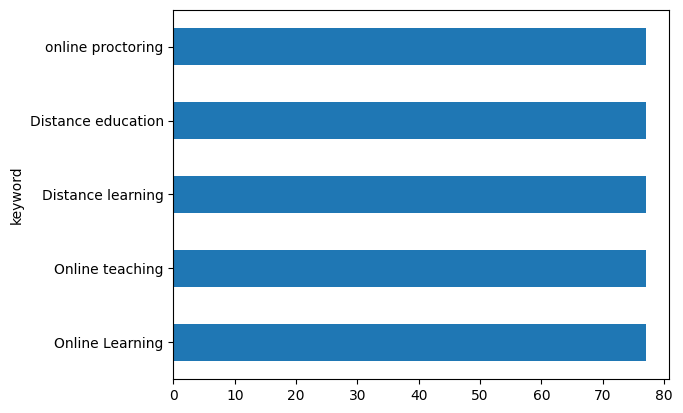

In [15]:
# Veri seti düzenlenmiş olduğu için eşit sayıda kelime incelenmiştir.
df["keyword"].value_counts().plot.barh()

### Online Learning Kelimesinin Zamana Göre Aratılma Sıklığı

In [16]:
# hits sütunu sayı olarak işlenir
df["hits"] = pd.to_numeric(df["hits"], errors="coerce")

In [17]:
# date sütunu datetime formatına çevrilir
df["date"] = pd.to_datetime(df["date"])

In [18]:
# keyword sütunundan sadece "online learning" kelimesi filtrelenir
learning_df = df[df["keyword"] == "Online Learning"]
teaching_df = df[df["keyword"] == "Online teaching"]

In [19]:
# Ortak zaman aralığına göre merge işlemi
merged_df = pd.merge(
    learning_df[["date", "hits"]].rename(columns={"hits": "learning_hits"}),
    teaching_df[["date", "hits"]].rename(columns={"hits": "teaching_hits"}),
    on="date"
)

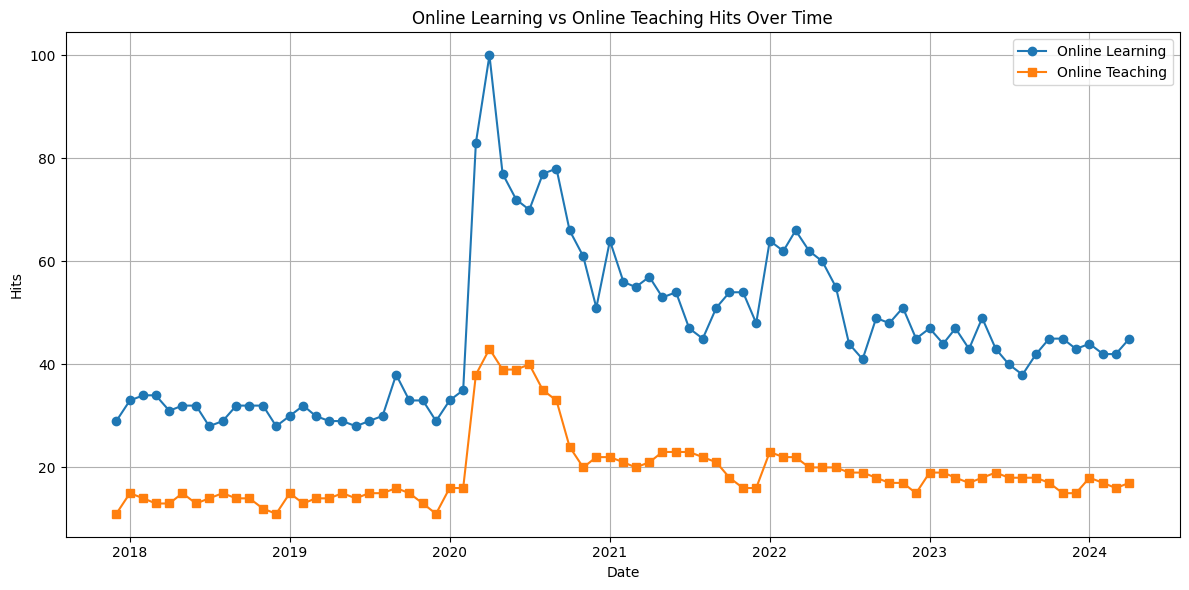

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged_df["date"], merged_df["learning_hits"], label="Online Learning", marker='o')
plt.plot(merged_df["date"], merged_df["teaching_hits"], label="Online Teaching", marker='s')
plt.title("Online Learning vs Online Teaching Hits Over Time")
plt.xlabel("Date")
plt.ylabel("Hits")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

COVID-19 salgını sırasında hem online learning hem de online teaching kavramlarına olan ilgi arttığı için bu iki değişken arasında güçlü bir doğrusal ilişki gözlenmiştir. Bu durum kovaryans değerinin yüksek çıkmasına neden olmuştur.

In [21]:
# Kovaryans hesaplanır
covariance = merged_df[["learning_hits", "teaching_hits"]].cov()
print(covariance)

               learning_hits  teaching_hits
learning_hits     234.569378      94.436603
teaching_hits      94.436603      47.880041


İki değişken arasındaki kovaryans pozitif ve büyüktür (94.44), bu da pandemi döneminde her iki kavrama olan ilginin birlikte arttığını göstermektedir. Bu ilişkiyi daha yorumlanabilir hale getirmek için korelasyon katsayısı da hesaplanmış ve 0.8911 değeri elde edilmiştir.

In [22]:
# Korelasyon hesaplama
correlation = merged_df[["learning_hits", "teaching_hits"]].corr()
print(correlation)

               learning_hits  teaching_hits
learning_hits       1.000000       0.891102
teaching_hits       0.891102       1.000000


# Covid 19 Search ile Education Search Karşılaştırması

In [2]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from prophet import Prophet
from scipy.signal import correlate

# 1. Verileri Yükle
df_covid = pd.read_csv("covid_search_world.csv")
df_education = pd.read_csv("education_search_world.csv")

c:\Users\asligul\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [ ]:
# 2. Tarih formatını düzelt
df_covid["date"] = pd.to_datetime(df_covid["date"])
df_education["date"] = pd.to_datetime(df_education["date"])

# 2.5. '<1' gibi verileri temizle
def clean_hits(x):
    if isinstance(x, str):
        if '<' in x:
            return 0.5  # '<1' gibi değerleri 0.5 kabul ediyoruz
        else:
            return float(x)  # normal stringleri sayıya çevir
    return x

df_covid["hits"] = df_covid["hits"].apply(clean_hits)
df_education["hits"] = df_education["hits"].apply(clean_hits)

In [ ]:
# 3. Verileri birleştir (date üzerinden)
df_merged = pd.merge(df_covid, df_education, on="date", suffixes=("_covid", "_education"))

In [ ]:
# 4. Pearson Korelasyon
correlation = df_merged["hits_covid"].corr(df_merged["hits_education"])
print(f"📊 Pearson Korelasyon Katsayısı (Covid vs. Eğitim Aramaları): {correlation:.4f}")

In [ ]:
# 5. T Testi: Pandemi Öncesi ve Sonrası Eğitim Arama Hacmi
pre_covid = df_merged[df_merged["date"] < "2020-03-01"]["hits_education"]
post_covid = df_merged[df_merged["date"] >= "2020-03-01"]["hits_education"]
t_stat, p_value = ttest_ind(pre_covid, post_covid, equal_var=False)
print(f"\n📊 T Testi Sonuçları:")
print(f"T İstatistiği: {t_stat:.4f}")
print(f"P-değeri: {p_value:.4f}")
if p_value < 0.05:
    print("Pandemi öncesi ve sonrası arasında İSTATİSTİKSEL olarak ANLAMLI bir fark var.")
else:
    print("Pandemi öncesi ve sonrası arasında İSTATİSTİKSEL olarak anlamlı bir fark YOK.")

In [ ]:
# 6. İteratif Çiftler Karşılaştırması
df_comparison = pd.DataFrame({
    "date": df_merged["date"],
    "Covid Hits": df_merged["hits_covid"],
    "Education Hits": df_merged["hits_education"],
    "Difference": abs(df_merged["hits_covid"] - df_merged["hits_education"])
})
print("\n📊 İteratif Çiftler Karşılaştırması (İlk 5 Kayıt):")
print(df_comparison.head())


In [ ]:
# 7. Çapraz Korelasyon Hesaplama
education_series = df_merged["hits_education"] - df_merged["hits_education"].mean()
covid_series = df_merged["hits_covid"] - df_merged["hits_covid"].mean()

cross_corr = correlate(covid_series, education_series, mode="full")
lags = np.arange(-len(df_merged) + 1, len(df_merged))

lag_with_max_correlation = lags[np.argmax(cross_corr)]
max_correlation = max(cross_corr)

print(f"\n📊 En yüksek çapraz korelasyon değeri: {max_correlation:.4f}")
print(f"🕒 En iyi gecikme süresi: {lag_with_max_correlation} hafta")

In [ ]:
# 8. Çapraz Korelasyonu Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr, label="Çapraz Korelasyon", color="purple")
plt.axvline(lag_with_max_correlation, color='red', linestyle='--', label=f"En iyi gecikme: {lag_with_max_correlation} hafta")
plt.xlabel("Gecikme (Lag) Haftaları")
plt.ylabel("Çapraz Korelasyon Değeri")
plt.title("📊 Covid-19 vs Eğitim Arama Trendleri - Çapraz Korelasyon Analizi")
plt.legend()
plt.show(block=False)


In [ ]:
# 9. Zaman Serisi Analizi - Prophet Modeli (Education Aramaları için)
df_prophet = df_merged[["date", "hits_education"]].rename(columns={"date": "ds", "hits_education": "y"})
model = Prophet()
model.fit(df_prophet)

In [ ]:
# 10. Gelecek Tahminleri
future = model.make_future_dataframe(periods=180, freq='W')
forecast = model.predict(future)

In [ ]:
# 11. Tahminleri Görselleştir
model.plot(forecast)
plt.title("📊 Dijital Eğitim Arama Hacmi - Prophet Regresyon Tahmini", fontsize=16)
plt.xlabel("Tarih")
plt.ylabel("Arama Hacmi (Hits)")
plt.axvline(pd.to_datetime("2020-03-01"), color='red', linestyle='--', label="Pandemi Başlangıcı (Mart 2020)")
plt.legend()
plt.show()

# Covid 19'un Okullar Üzerindeki Etkisi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri kümesini oku
df = pd.read_csv("covid_impact_education_full.csv")

In [ ]:
# 'Date' sütununu tarih formatına çevir
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
# Ülkelerin eğitim durumlarını sayarak gruplandır
status_counts = df.groupby(['Date', 'Status']).size().reset_index(name='Count')

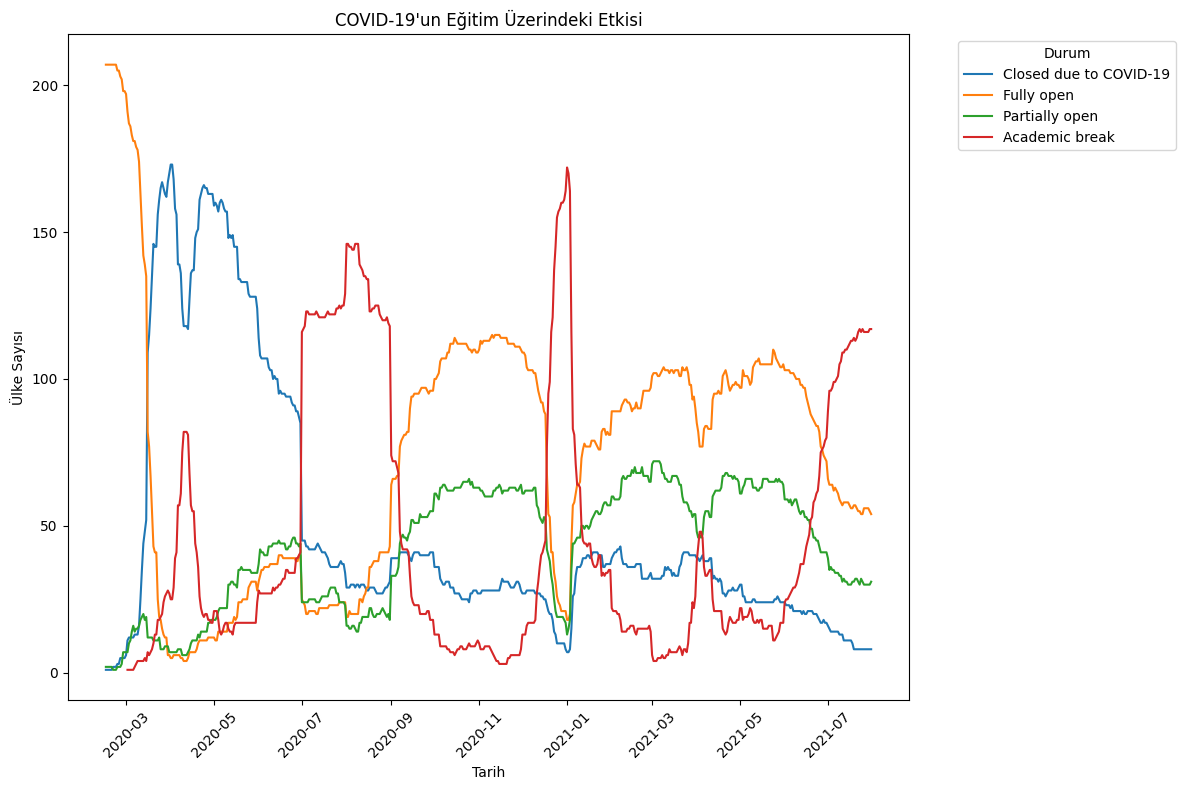

In [ ]:
# Grafik oluştur
plt.figure(figsize=(12, 8))
sns.lineplot(data=status_counts, x='Date', y='Count', hue='Status', markers=True)
# Grafiği özelleştir
plt.title("COVID-19'un Eğitim Üzerindeki Etkisi")
plt.xlabel("Tarih")
plt.ylabel("Ülke Sayısı")
plt.xticks(rotation=45)
plt.legend(title='Durum', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Grafiği göster
plt.show()

# Pandemi Sürecinde Platformların Karşılaştırmalı Kullanım Trendleri

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükle
df = pd.read_csv("edu_only_Collaboration_platforms_world.csv")

# Tarihi datetime formatına çevir
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Eksik verileri temizle
df.dropna(subset=["hits", "date", "keyword"], inplace=True)

# Kullanım verisini sayıya çevir (eğer 'hits' string olarak gelirse)
df["hits"] = pd.to_numeric(df["hits"], errors="coerce")
df.dropna(subset=["hits"], inplace=True)

# Tarihe göre sırala
df.sort_values("date", inplace=True)

# Pivot tablo oluştur: satırlar = tarih, sütunlar = platform (keyword), değerler = hits
pivot_df = df.pivot_table(index="date", columns="keyword", values="hits", aggfunc="sum")

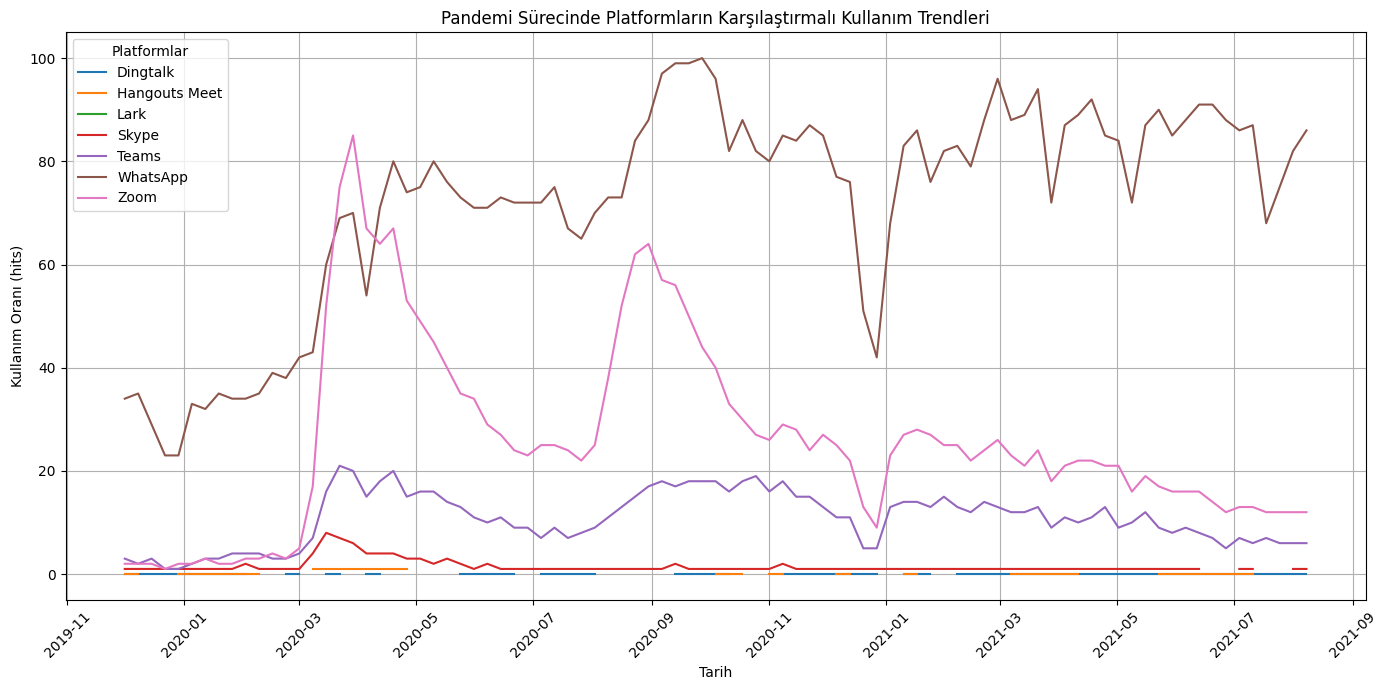

In [ ]:
# Grafik çizimi
plt.figure(figsize=(14, 7))
for platform in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[platform], label=platform)

plt.xlabel("Tarih")
plt.ylabel("Kullanım Oranı (hits)")
plt.title("Pandemi Sürecinde Platformların Karşılaştırmalı Kullanım Trendleri")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Platformlar")
plt.tight_layout()
plt.show()

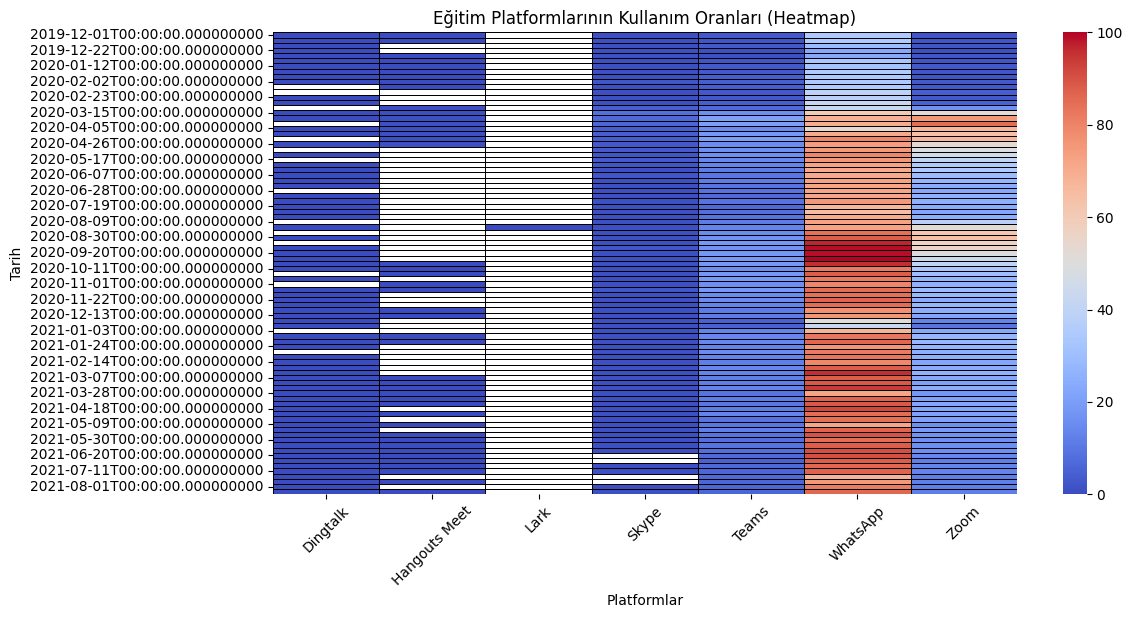

In [ ]:
# Heatmap oluşturma
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="coolwarm", linewidths=0.5, linecolor='black')

plt.title("Eğitim Platformlarının Kullanım Oranları (Heatmap)")
plt.xlabel("Platformlar")
plt.ylabel("Tarih")
plt.xticks(rotation=45)
plt.show()

### Online Learning Kelimesinin Zamana Göre Aratılma Sıklığı

In [ ]:
# hits sütunu sayı olarak işlenir
df["hits"] = pd.to_numeric(df["hits"], errors="coerce")

In [ ]:
# date sütunu datetime formatına çevrilir
df["date"] = pd.to_datetime(df["date"])

In [ ]:
# keyword sütunundan sadece "online learning" kelimesi filtrelenir
learning_df = df[df["keyword"] == "Online Learning"]
teaching_df = df[df["keyword"] == "Online teaching"]

In [ ]:
# Ortak zaman aralığına göre merge işlemi
merged_df = pd.merge(
    learning_df[["date", "hits"]].rename(columns={"hits": "learning_hits"}),
    teaching_df[["date", "hits"]].rename(columns={"hits": "teaching_hits"}),
    on="date"
)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged_df["date"], merged_df["learning_hits"], label="Online Learning", marker='o')
plt.plot(merged_df["date"], merged_df["teaching_hits"], label="Online Teaching", marker='s')
plt.title("Online Learning vs Online Teaching Hits Over Time")
plt.xlabel("Date")
plt.ylabel("Hits")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

COVID-19 salgını sırasında hem online learning hem de online teaching kavramlarına olan ilgi arttığı için bu iki değişken arasında güçlü bir doğrusal ilişki gözlenmiştir. Bu durum kovaryans değerinin yüksek çıkmasına neden olmuştur.

In [ ]:
# Kovaryans hesaplanır
covariance = merged_df[["learning_hits", "teaching_hits"]].cov()
print(covariance)

İki değişken arasındaki kovaryans pozitif ve büyüktür (94.44), bu da pandemi döneminde her iki kavrama olan ilginin birlikte arttığını göstermektedir. Bu ilişkiyi daha yorumlanabilir hale getirmek için korelasyon katsayısı da hesaplanmış ve 0.8911 değeri elde edilmiştir.

In [ ]:
# Korelasyon hesaplama
correlation = merged_df[["learning_hits", "teaching_hits"]].corr()
print(correlation)

### Keywordler İçin Aranma Sıklığı Dağılımı

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('education_search_world.csv')

# Uygun tarih formatına çevrilir.
df['date'] = pd.to_datetime(df['date'])

# Gerekli sütunlara alınır.
df = df[['date', 'hits', 'keyword']]

# Keyword'e göre gruplanır.
keywords = df['keyword'].unique()

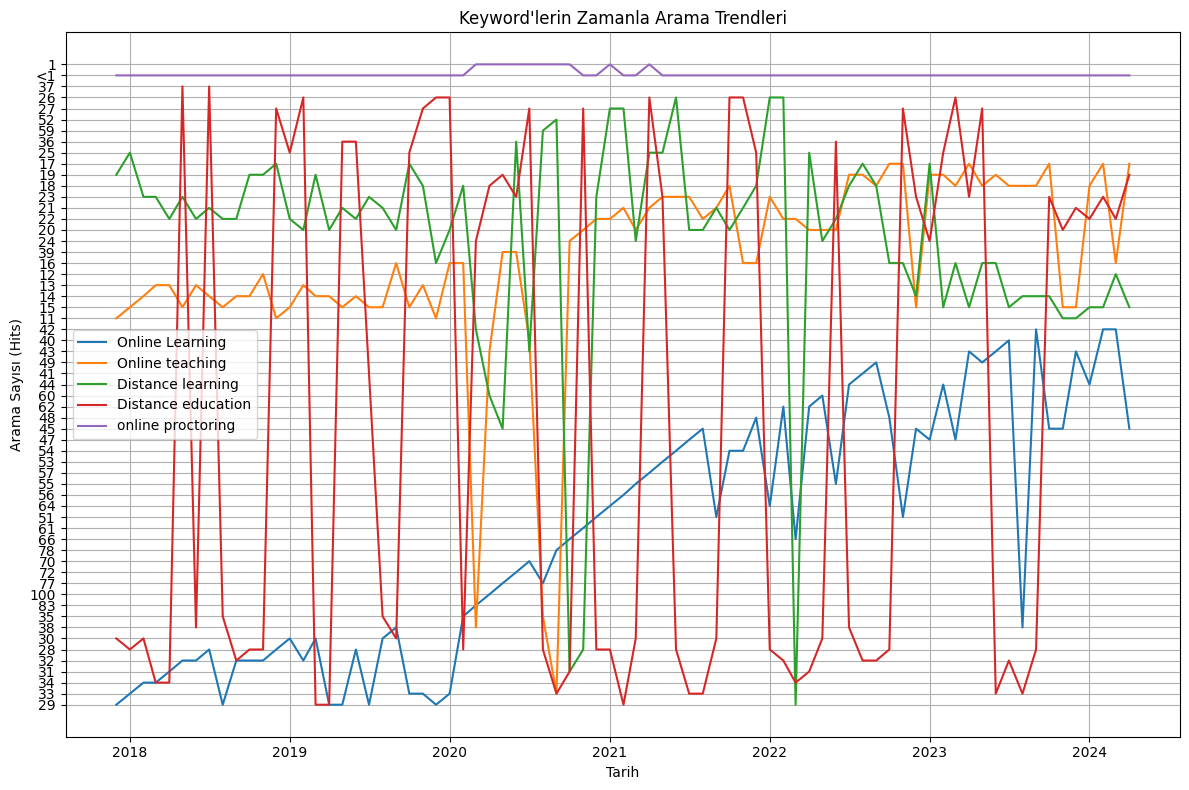

In [3]:
plt.figure(figsize=(12, 8))

for keyword in keywords:
    subset = df[df['keyword'] == keyword]
    subset = subset.sort_values('date')  # Tarihe göre sırala
    plt.plot(subset['date'], subset['hits'], label=keyword)

plt.title('Keyword\'lerin Zamanla Arama Trendleri')
plt.xlabel('Tarih')
plt.ylabel('Arama Sayısı (Hits)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()